# Bayesian Inference

<img src="images/smoking.jpg"/>

## Getting Started

In this lab we will review exploratory data analysis using the `ggplot2` 
package for data visualization, which is included in the `tidyverse`. The main 
focus of this lab is to be able to obtain and interpret credible intervals and 
hypothesis tests using Bayesian methods for numerical variables. The data and 
functions for inference can be found in the companion package for this course, 
`statsr`. 

Let's load the necessary packages for this week's lab:

### Load Libraries

In [1]:
#install.packages("package")
library(PairedData)
library(tidyverse)
library(statsr)

Loading required package: MASS

Loading required package: gld

Loading required package: mvtnorm

Loading required package: lattice

Loading required package: ggplot2


Attaching package: 'PairedData'


The following object is masked from 'package:base':

    summary


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v tibble  3.0.3     v dplyr   1.0.0
v tidyr   1.1.0     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.4     

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x dplyr::select() masks MASS::select()



### The data

In 2004, the state of North Carolina released a large data set containing 
information on births recorded in this state. This data set is useful to 
researchers studying the relation between habits and practices of expectant 
mothers and the birth of their children. We will work with a random sample 
of observations from this data set.

Let's load the `nc` data set into our workspace from the `statsr` package.

In [2]:
data(nc)
head(nc)

fage,mage,mature,weeks,premie,visits,marital,gained,weight,lowbirthweight,gender,habit,whitemom
<int>,<int>,<fct>,<int>,<fct>,<int>,<fct>,<int>,<dbl>,<fct>,<fct>,<fct>,<fct>
NA,13,younger mom,39,full term,10,married,38,7.63,not low,male,nonsmoker,not white
NA,14,younger mom,42,full term,15,married,20,7.88,not low,male,nonsmoker,not white
19,15,younger mom,37,full term,11,married,38,6.63,not low,female,nonsmoker,white
21,15,younger mom,41,full term,6,married,34,8.00,not low,male,nonsmoker,white
NA,15,younger mom,39,full term,9,married,27,6.38,not low,female,nonsmoker,not white
NA,15,younger mom,38,full term,19,married,22,5.38,low,male,nonsmoker,not white


We have observations on 13 different variables, some categorical and some 
numerical. The meaning of each variable is as follows.

variable         | description
---------------- | ---------------------------------------------
`fage`           | father's age in years.
`mage`           | mother's age in years.
`mature`         | maturity status of mother.
`weeks`          | length of pregnancy in weeks.
`premie`         | whether the birth was classified as premature (premie) or full-term.
`visits`         | number of hospital visits during pregnancy.
`marital`        | whether mother is `married` or `not married` at birth.
`gained`         | weight gained by mother during pregnancy in pounds.
`weight`         | weight of the baby at birth in pounds.
`lowbirthweight` | whether baby was classified as low birthweight (`low`) or not (`not low`).
`gender`         | gender of the baby, `female` or `male`.
`habit`          | status of the mother as a `nonsmoker` or a `smoker`.
`whitemom`       | whether mom is `white` or `not white`.

Note: These data should be familiar for those  who took the 
*Inferential Statistics* course as part of the *Statistics with R* 
specialization, where the `nc` data were  used in the 
**Inference for Numerical Data** lab.

### EDA

As a first step in the analysis, let's take a look at the variables in the 
dataset and how `R` has encoded them. The most straight forward way of doing 
this is using the `glimpse` function.

In [3]:
glimpse(nc)

Rows: 1,000
Columns: 13
$ fage           <int> NA, NA, 19, 21, NA, NA, 18, 17, NA, 20, 30, NA, NA, ...
$ mage           <int> 13, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, ...
$ mature         <fct> younger mom, younger mom, younger mom, younger mom, ...
$ weeks          <int> 39, 42, 37, 41, 39, 38, 37, 35, 38, 37, 45, 42, 40, ...
$ premie         <fct> full term, full term, full term, full term, full ter...
$ visits         <int> 10, 15, 11, 6, 9, 19, 12, 5, 9, 13, 9, 8, 4, 12, 15,...
$ marital        <fct> married, married, married, married, married, married...
$ gained         <int> 38, 20, 38, 34, 27, 22, 76, 15, NA, 52, 28, 34, 12, ...
$ weight         <dbl> 7.63, 7.88, 6.63, 8.00, 6.38, 5.38, 8.44, 4.69, 8.81...
$ lowbirthweight <fct> not low, not low, not low, not low, not low, low, no...
$ gender         <fct> male, male, female, male, female, male, male, male, ...
$ habit          <fct> nonsmoker, nonsmoker, nonsmoker, nonsmoker, nonsmoke...
$ whitemom       <fct> not w

Another useful function is `summary` which provides the range, quartiles, and 
means for numeric variables and counts for categorical variables. Additionally, 
if there are any missing observations (denoted `NA`), summary will provide the 
number of missing cases for each variable. Note that the output of the summary 
function can be too long and difficult to parse  visually and interpret if the 
dataset has a large number of variables.

In [4]:
summary(nc)

      fage            mage            mature        weeks             premie   
 Min.   :14.00   Min.   :13   mature mom :133   Min.   :20.00   full term:846  
 1st Qu.:25.00   1st Qu.:22   younger mom:867   1st Qu.:37.00   premie   :152  
 Median :30.00   Median :27                     Median :39.00   NA's     :  2  
 Mean   :30.26   Mean   :27                     Mean   :38.33                  
 3rd Qu.:35.00   3rd Qu.:32                     3rd Qu.:40.00                  
 Max.   :55.00   Max.   :50                     Max.   :45.00                  
 NA's   :171                                    NA's   :2                      
     visits            marital        gained          weight      
 Min.   : 0.0   married    :386   Min.   : 0.00   Min.   : 1.000  
 1st Qu.:10.0   not married:613   1st Qu.:20.00   1st Qu.: 6.380  
 Median :12.0   NA's       :  1   Median :30.00   Median : 7.310  
 Mean   :12.1                     Mean   :30.33   Mean   : 7.101  
 3rd Qu.:15.0            

As you review the variable summaries, consider which variables are categorical 
and which are numerical. For numerical variables, are there outliers? If you 
aren't sure or want to take a closer look at the data, you can make a graph.

For example, we can examine the distribution of the amount of weight that a 
mother `gained` with a histogram.

Warning message:
"Removed 27 rows containing non-finite values (stat_bin)."


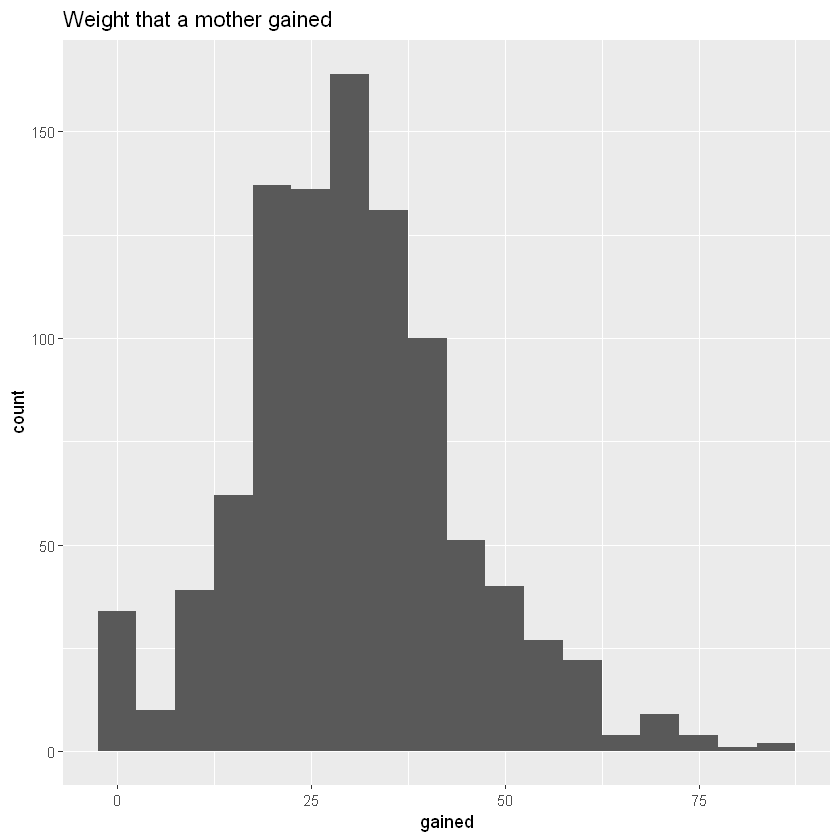

In [5]:
ggplot(data = nc, aes(x = gained)) +
    geom_histogram(binwidth = 5) +
    ggtitle("Weight that a mother gained")

This function says to plot the `gained` variable from the `nc` data frame on the 
x-axis. It also defines a `geom` (short for geometric object), which describes 
the type of plot you will produce. We used a binwidth of 5, however you can 
change this value and see how it affects the shape of the histogram. Also note 
that the function results in a warning saying that 27 rows have been removed. 
This is because 27 observations in the data have `NA` values for weight gained. 
You can confirm this by peeking back at the summary output above. If you need a 
refresher on using `ggplot2`, you may want to take some time to review the 
material in the earlier courses in this specialization.

**1. How many of the 13 variables are categorical?**

In [6]:
str(nc)

tibble [1,000 x 13] (S3: tbl_df/tbl/data.frame)
 $ fage          : int [1:1000] NA NA 19 21 NA NA 18 17 NA 20 ...
 $ mage          : int [1:1000] 13 14 15 15 15 15 15 15 16 16 ...
 $ mature        : Factor w/ 2 levels "mature mom","younger mom": 2 2 2 2 2 2 2 2 2 2 ...
 $ weeks         : int [1:1000] 39 42 37 41 39 38 37 35 38 37 ...
 $ premie        : Factor w/ 2 levels "full term","premie": 1 1 1 1 1 1 1 2 1 1 ...
 $ visits        : int [1:1000] 10 15 11 6 9 19 12 5 9 13 ...
 $ marital       : Factor w/ 2 levels "married","not married": 1 1 1 1 1 1 1 1 1 1 ...
 $ gained        : int [1:1000] 38 20 38 34 27 22 76 15 NA 52 ...
 $ weight        : num [1:1000] 7.63 7.88 6.63 8 6.38 5.38 8.44 4.69 8.81 6.94 ...
 $ lowbirthweight: Factor w/ 2 levels "low","not low": 2 2 2 2 2 1 2 1 2 2 ...
 $ gender        : Factor w/ 2 levels "female","male": 2 2 1 2 1 2 2 2 2 1 ...
 $ habit         : Factor w/ 2 levels "nonsmoker","smoker": 1 1 1 1 1 1 1 1 1 1 ...
 $ whitemom      : Factor w/ 2 levels "n

    Answer: 7.

We will start with analyzing the weight of the babies at birth, which is 
contained in the variable `weight`.


Use a visualization such as a histogram and summary statistics tools in R to 
analyze the distribution of `weight`. 

**2. Which of the following best describes the 
distribution of `weight`?**

In [7]:
summary(nc$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.380   7.310   7.101   8.060  11.750 

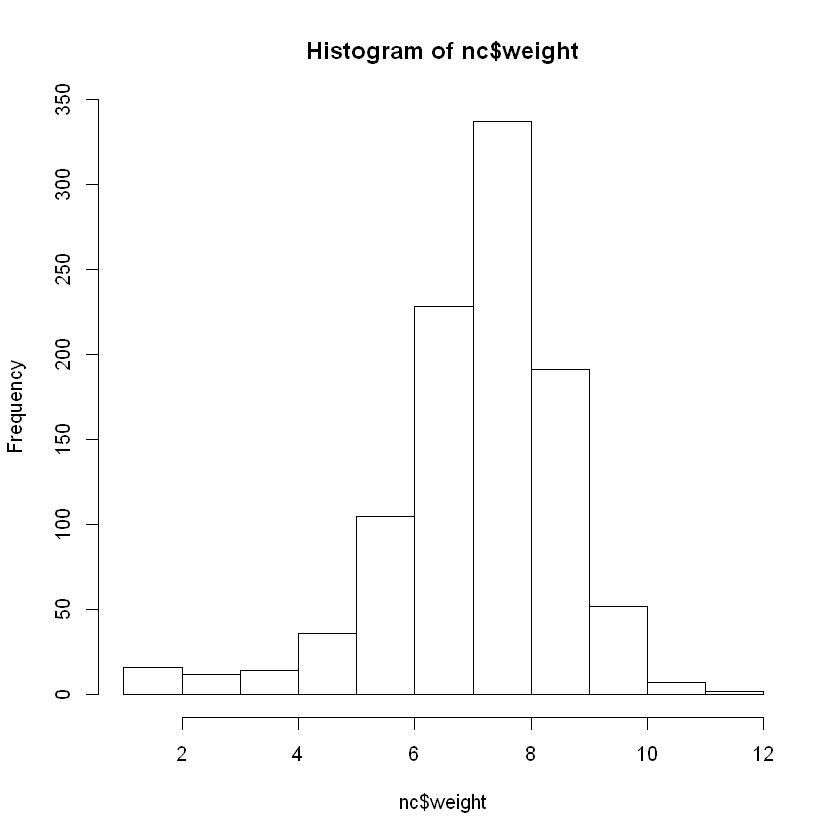

In [8]:
hist(nc$weight)

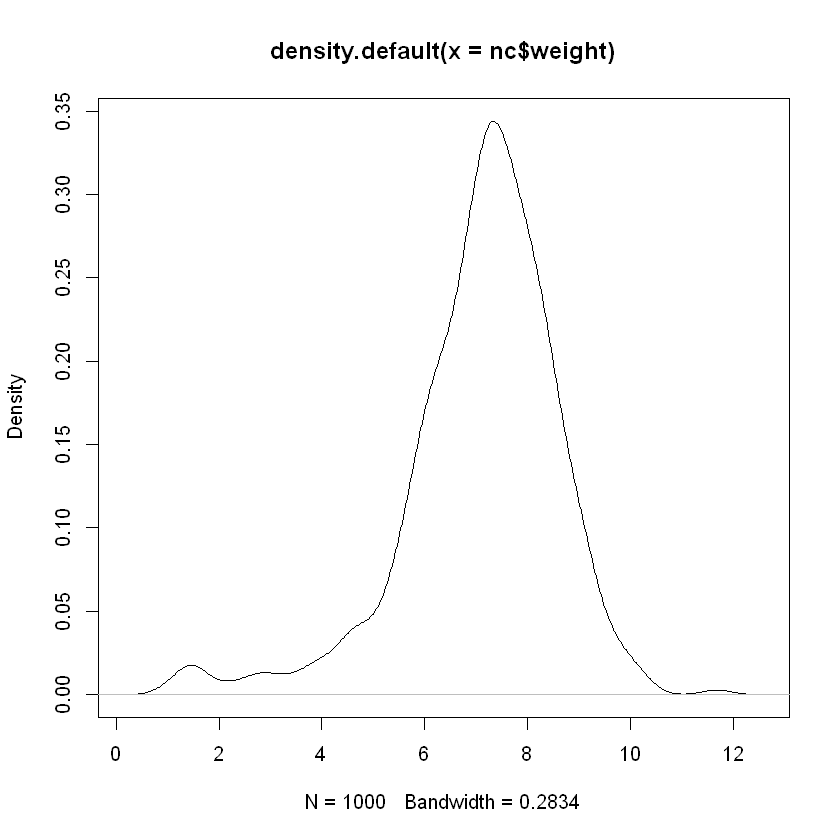

In [9]:
plot(density(nc$weight))

    Answer: Left skewed.

The variable `premie` in the dataframe classifies births on whether they were 
full-term or premie. We can use some of the functions of `dplyr` to create a 
new dataframe to limit the analysis to full term births.

In [10]:
table(nc$premie)


full term    premie 
      846       152 

In [11]:
nc_fullterm = filter(nc, premie == 'full term')

summary(nc_fullterm)

# Alternative: 
#nc_fullterm = nc[nc$premie == 'full term',]

      fage            mage            mature        weeks             premie   
 Min.   :14.00   Min.   :13   mature mom :109   Min.   :37.00   full term:846  
 1st Qu.:25.00   1st Qu.:22   younger mom:737   1st Qu.:38.00   premie   :  0  
 Median :30.00   Median :27                     Median :39.00                  
 Mean   :30.24   Mean   :27                     Mean   :39.25                  
 3rd Qu.:35.00   3rd Qu.:32                     3rd Qu.:40.00                  
 Max.   :50.00   Max.   :50                     Max.   :45.00                  
 NA's   :132                                                                   
     visits             marital        gained          weight      
 Min.   : 0.00   married    :312   Min.   : 0.00   Min.   : 3.750  
 1st Qu.:10.00   not married:534   1st Qu.:22.00   1st Qu.: 6.750  
 Median :12.00                     Median :30.00   Median : 7.440  
 Mean   :12.35                     Mean   :31.13   Mean   : 7.459  
 3rd Qu.:15.00      

The `filter` function selects variables all variables from the dataframe `nc` 
where the condition `premie` equals "full term" is met.

**Exercise:** Repeat the visualization and summary with the weights from full term term 
births. Does `weight` appear to be approximately normally distributed?

In [12]:
summary(nc_fullterm$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  3.750   6.750   7.440   7.459   8.190  11.750 

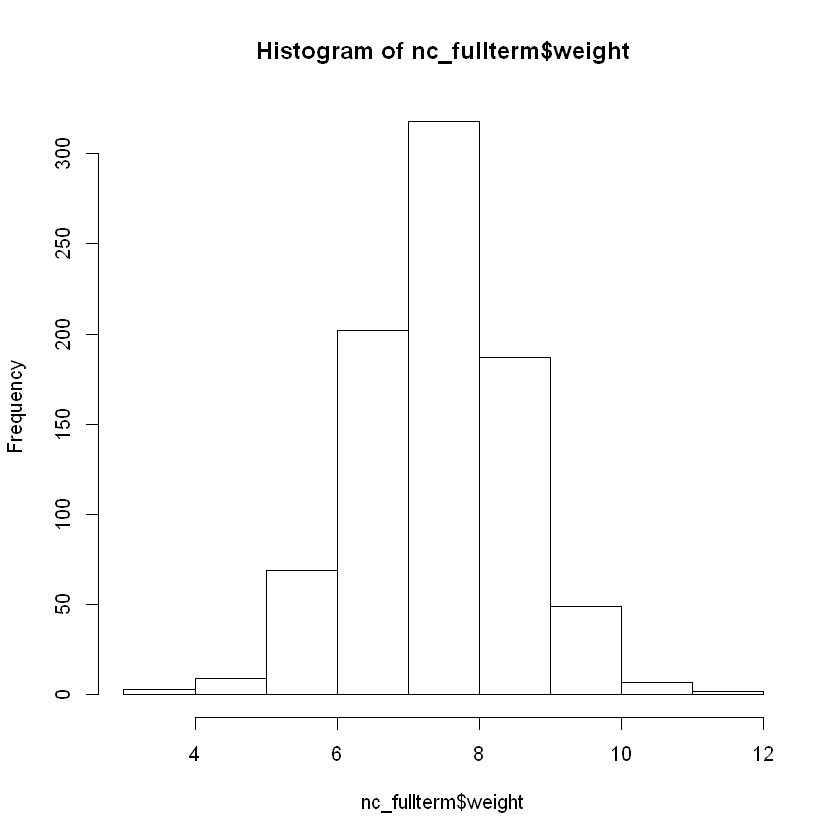

In [13]:
hist(nc_fullterm$weight)

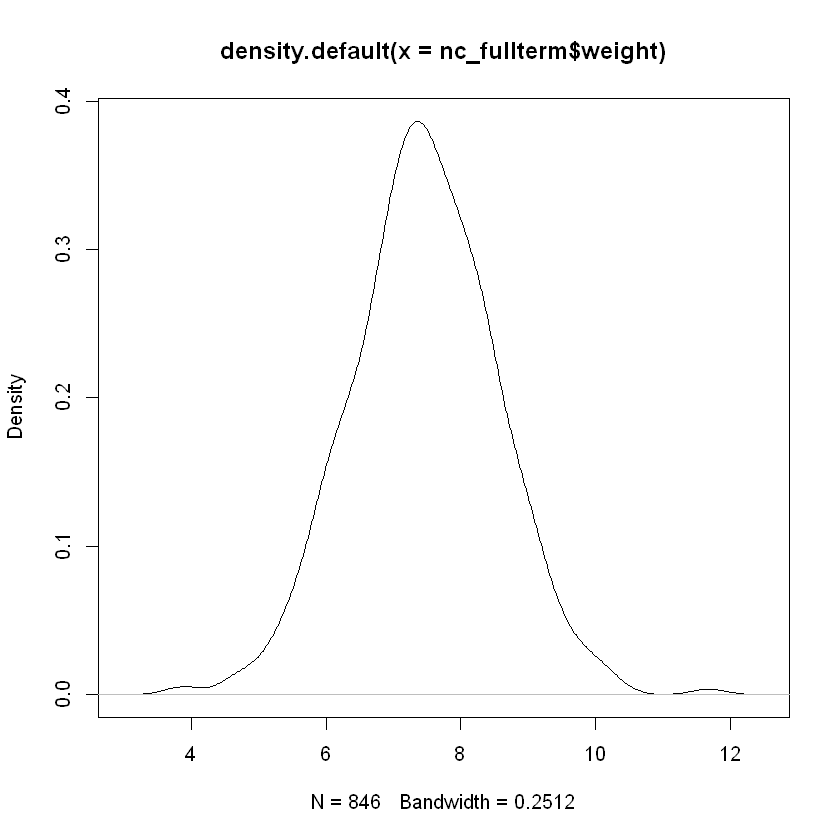

In [14]:
plot(density(nc_fullterm$weight))

    Answer: Yes. Very close to a normal distribution.

## Inference

As with the frequentist approach we use these data to perform basic inference on $\mu$ the average weight of all babies born in North Carolina. To do this we will use the `bayes_inference` function which will allow us construct credible intervals and calculate Bayes factors for a variety of different circumstances.

In order to construct a credible interval we must first provide the data, `weight` in this case, and then indicate that we want a credible interval (`type="ci"`) for a mean (`statistic="mean"`).

Single numerical variable
n = 1000, y-bar = 7.101, s = 1.5089
(Assuming improper prior: P(mu, sigma^2) = 1/sigma^2)

99% CI: (6.978 , 7.2237)

Post. mean   = 7.101 
Post. median = 7.1009 
Post. mode   = 7.1001 


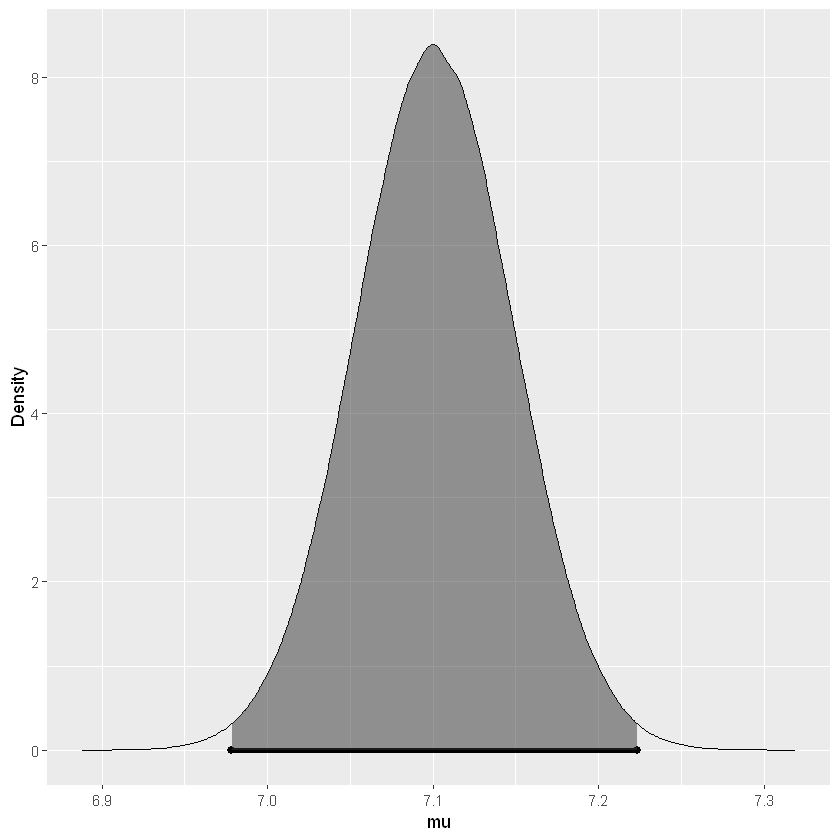

In [15]:
bayes_inference(y = weight, data = nc, statistic = "mean", type = "ci", cred_level = 0.99)

The credible level for the interval can be specified using the `cred_level` argument.

**3. Which of the following corresponds to the 99% credible interval for the average birth weight of all children born in North Carolina?**

    Answer: (6.98 , 7.22)

We can also conduct a Bayesian hypothesis test by calculating a Bayes factor, let's test to see if the average birth weight in North Carolina is significantly different from 7 pounds. 

$$ H_1: \mu = 7 $$
$$ H_2: \mu \ne 7 $$

To conduct this hypothesis test we will again use the `bayes_inference` function but this time specify `type="ht"`, will then also need to provide the `null` and `alternative` arguments which define the null value (7) and the type of alternative hypothesis (`"twosided"`).

Single numerical variable
n = 1000, y-bar = 7.101, s = 1.5089
(Assuming improper prior: P(mu, sigma^2) = 1/sigma^2)

Hypotheses:
H1: mu = 7
H2: mu != 7

Priors:
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H1:H2] = 3.3915
P(H1|data) = 0.7723 
P(H2|data) = 0.2277 


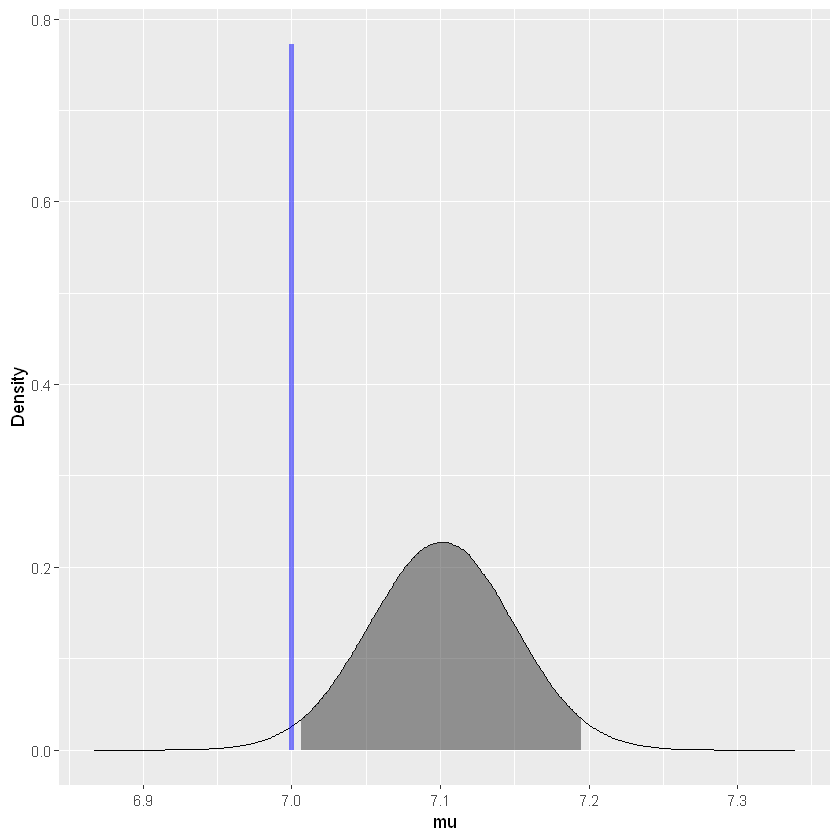

In [16]:
bayes_inference(y = weight, data = nc, statistic = "mean", type = "ht", null = 7, alternative = "twosided")

**5. Based of Jeffrey's scale for interpretation of a Bayes factors how should be describe the evidence in favor of $H_1$ from the results above?**

    Answer: Positive

The graphical results show the magnitude of $P(H_1 ~|~ data)$ with the blue line and the posterior of $\mu$ given $H_2$ (scaled by $P(H_2 ~|~ data)$) via the black curve. The 95% credible interval for $\mu|data,H_2$ is given in grey.

**Exercise**: In the US low birth is defined as being less than 2500 grams ($\approx 5.5$ lbs). Use the `bayes_inference` function to assess if the average birth weight in North Carolina is significantly different from this value. (The answer here should be obvious, but make sure that the Bayes factor result conforms with your intuition.)

Single numerical variable
n = 1000, y-bar = 7.101, s = 1.5089
(Assuming improper prior: P(mu, sigma^2) = 1/sigma^2)

Hypotheses:
H1: mu = 5.5
H2: mu != 5.5

Priors:
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H2:H1] = 9.42506e+161
P(H1|data) = 0 
P(H2|data) = 1 


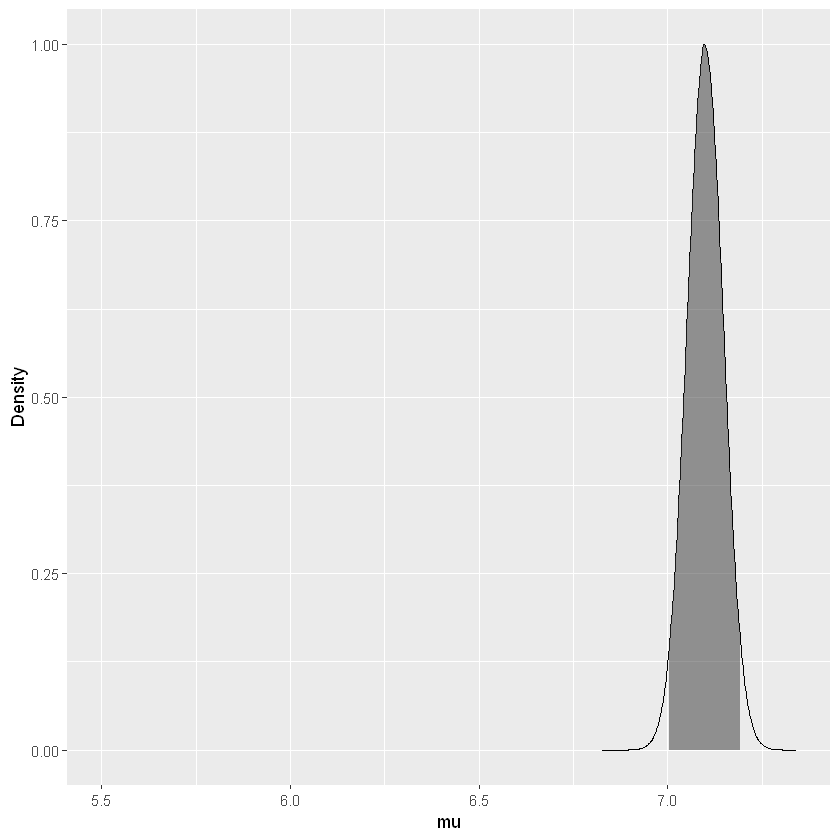

In [17]:
bayes_inference(y = weight, data = nc, statistic = "mean", type = "ht", null = 5.5, alternative = "twosided")

## Inference for Two Means

Next, let's consider if the mother's smoking habit has any clear effect on the child's birth weight. Here we will use the variable `habit` to distinguish between smoking and non-smoking mothers. As with any analysis, a visualization is a good place to start, and will give us a better understanding of the data.

**Exercise**: Construct a side-by-side boxplot of `habit` and `weight` and compare the two distributions.

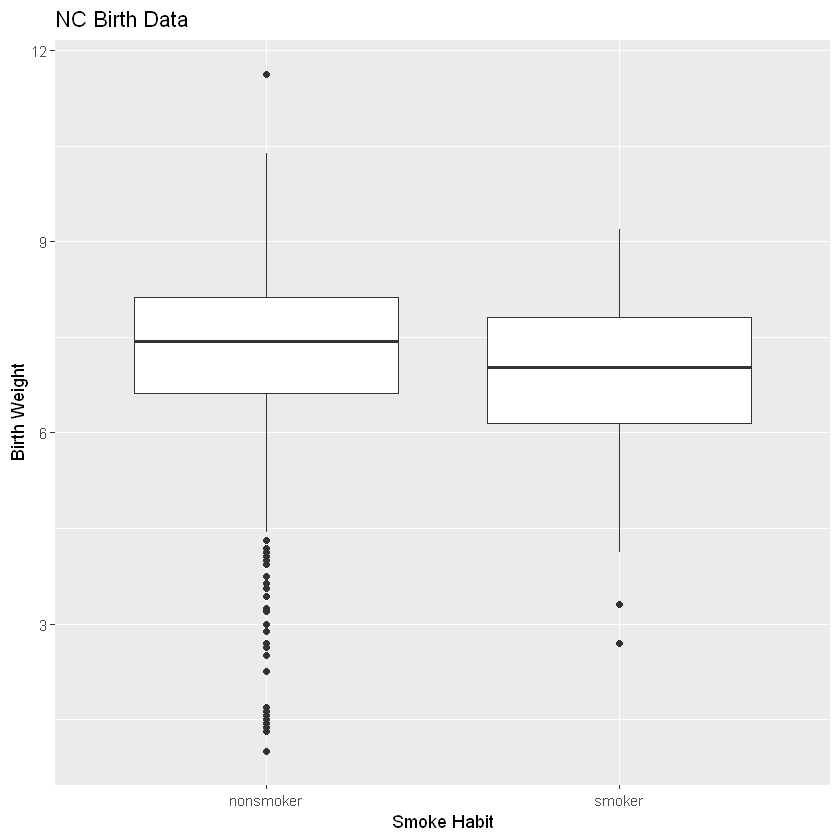

In [18]:
# Clean NA data
ncc <- na.omit(nc) 

ggplot(ncc, aes(habit,weight)) + 
    geom_boxplot() + 
    ggtitle("NC Birth Data") +
    xlab("Smoke Habit") +
    ylab("Birth Weight")

# Alternative:
# boxplot(weight~habit,data=nc, main="NC Birth Data", xlab="Smoke Habit", ylab="Birth Weight")

In [19]:
nc_smoker <- nc %>% filter(habit == "smoker")
nc_nonsmoker <- nc %>% filter(habit == "nonsmoker")

summary(nc_smoker$weight)
summary(nc_nonsmoker$weight)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.690   6.077   7.060   6.829   7.735   9.190 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.440   7.310   7.144   8.060  11.750 

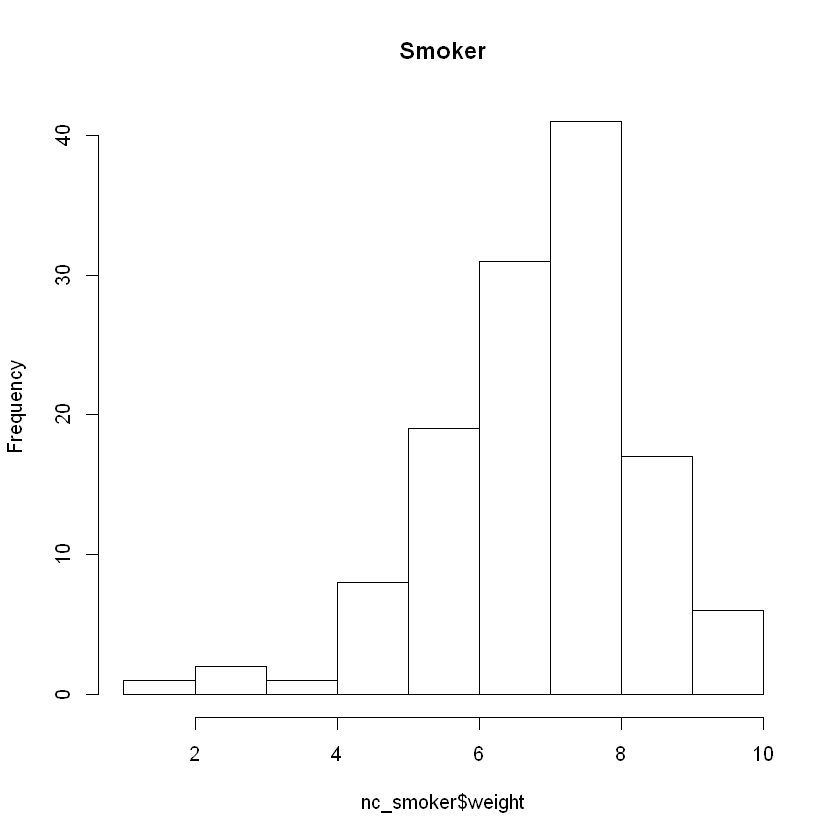

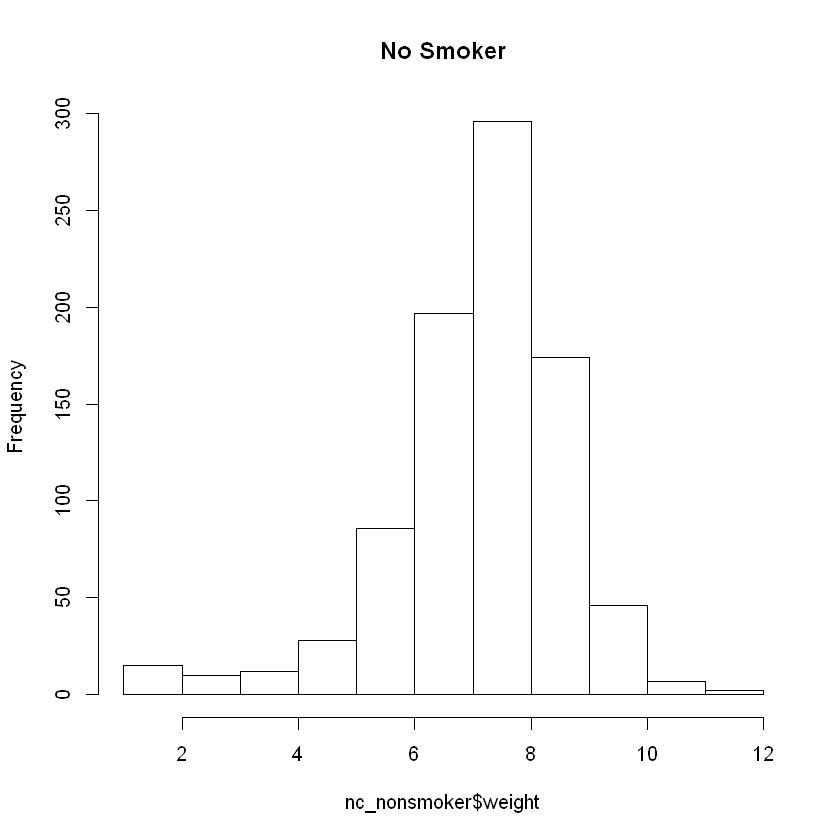

In [20]:
hist(nc_smoker$weight, main="Smoker")

hist(nc_nonsmoker$weight, main="No Smoker")

**5. Which of the following is *true* about the relationship between habit and weight?**

Answer:

    -Median birth weight of babies born to non-smoker mothers is slightly higher than that of babies born to smoker mothers.
    -Range of birth weights of babies born to non-smoker mothers is greater than that of babies born to smoker mothers.
    -The IQRs of the distributions are roughly equal.

As before we can use the `bayes_inference` function to either construct a credible interval and or calculate a Bayes factor. The calls will be identical to the single mean case except now we will provide `habit` as a predictor variable (argument `x`). Note we also change `null=0`, since we are interested in comparing if the means of the two groups are equal or not.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
(Assuming independent Jeffrey's priors for mu and sigma^2)

95% Cred. Int.: (0.0508 , 0.5798)

Post. mean   = 0.3155 
Post. median = 0.3157 
Post. mode   = 0.3137 


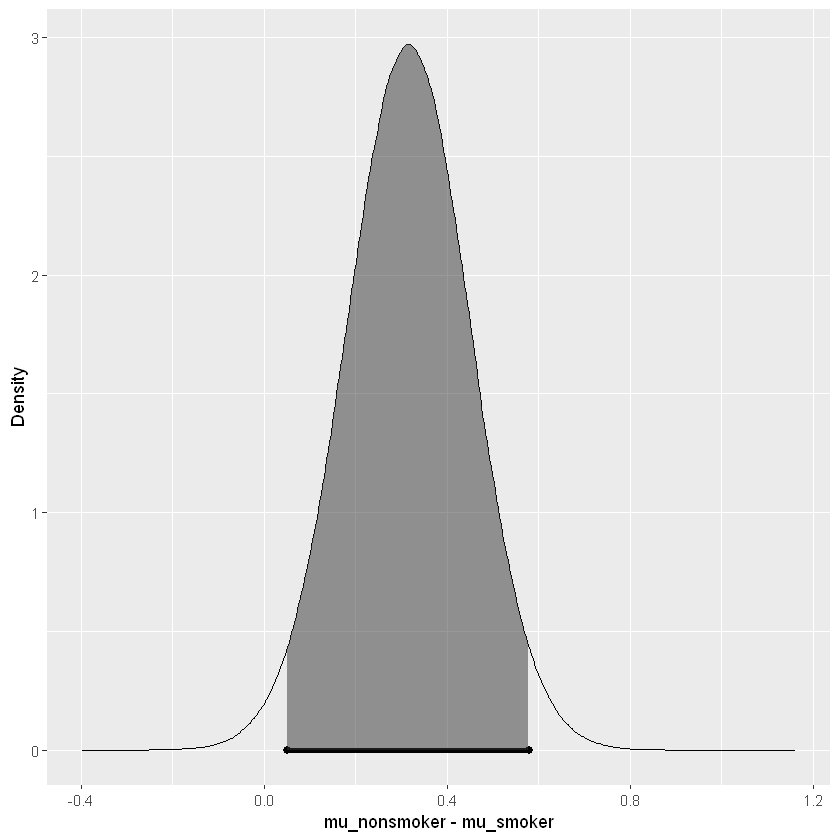

In [21]:
bayes_inference(y = weight, x = habit, data = nc, statistic = "mean", type = "ci")

**6. Based on the credible interval is there evidence that smoking reduces birth weight?**

    Answer: Yes.

Response variable: numerical, Explanatory variable: categorical (2 levels)
n_nonsmoker = 873, y_bar_nonsmoker = 7.1443, s_nonsmoker = 1.5187
n_smoker = 126, y_bar_smoker = 6.8287, s_smoker = 1.3862
(Assuming intrinsic prior on parameters)
Hypotheses:
H1: mu_nonsmoker  = mu_smoker
H2: mu_nonsmoker != mu_smoker

Priors:
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H1:H2] = 1.4387
P(H1|data) = 0.5899 
P(H2|data) = 0.4101 


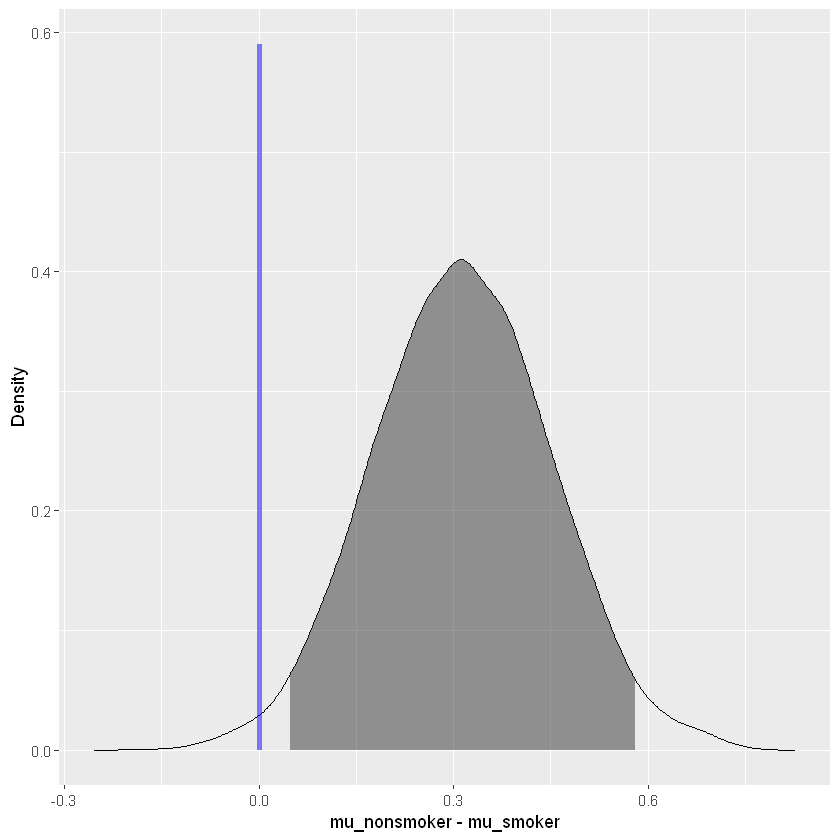

In [22]:
bayes_inference(y = weight, x = habit, data = nc, statistic = "mean", type = "ht", null = 0, alternative = "twosided")

**7. Based on the Bayes factor calculated above, how strong is evidence against $H_1$?**

    Answer:Not worth a bare mention.

## Inference for Proportions

Finally, we can also conduct Bayesian inference when our outcome variable of interest is categorical. As with the frequentist inference function the only change is to specify a $y$ argument that is categorical (with only two levels) and then specify which of its levels is the "success" using the `success` argument and finally change the `statistic` of interest to `"proportion"`.

For example if we want to test if only 7.5% of births in North Carolina are considered low birth weight we can calculate the Bayes factor using the following code:

Single categorical variable, success: low
n = 1000, p-hat = 0.111

Hypotheses:
H1: p = 0.075
H2: p != 0.075

Priors:
P(p) ~ Beta(a=75,b=925)
P(H1) = 0.2 
P(H2) = 0.8 

Results:
BF[H2:H1] = 50.3154
P(H1|data) = 0.0049 
P(H2|data) = 0.9951 


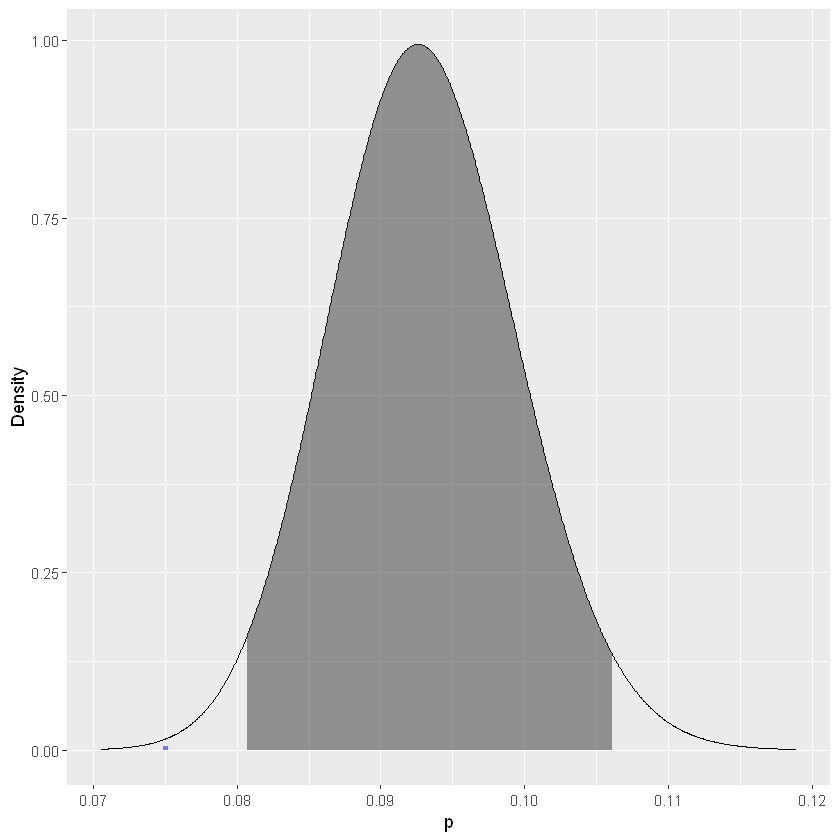

In [23]:
bayes_inference(y = lowbirthweight, data = nc, success = "low", statistic = "proportion", 
                beta_prior = c(a = 75, b = 925), hypothesis_prior = c(H1 = 0.2, H2 = 0.8), 
                type = "ht", null = 0.075, alternative = "twosided")

**8. How would the Bayes factor above change if we were to increase the prior probability of $H_2$?**

    Answer: Stay the same.

**9. How would the Bayes factor above change if we were to change the prior of p to be $Beta(75,925)$?**

    Answer: Get Smaller

Using what you have learned so far, conduct a Bayesian inference procedure to evaluate whether these data provide evidence for or against smoking being associated with low birth weight and smoking being associated with premature birth.

**10. These data provide ___________ evidence ___________ smoking affecting the chance of low birth weight.**

    Answer: weak; against.

Warning message in check_beta_prior(beta_prior1):
"No beta prior for p was specified, assuming a uniform prior (p ~ Beta(a=1,b=1)).
  This beta prior is specified using the argument beta_prior1=c(a,b),
  where a and b are your desired hyperparameters."
Warning message in check_beta_prior(beta_prior2):
"No beta prior for p was specified, assuming a uniform prior (p ~ Beta(a=1,b=1)).
  This beta prior is specified using the argument beta_prior2=c(a,b),
  where a and b are your desired hyperparameters."


Response variable: categorical (2 levels, success: low)
Explanatory variable: categorical (2 levels) 
n_nonsmoker = 873, p_hat_nonsmoker = 0.1054
n_smoker = 126, p_hat_smoker = 0.1429
Hypotheses:
H1: p_nonsmoker =  p_smoker
H2: p_nonsmoker != p_smoker

Priors:
P(p_nonsmoker) ~ Beta(a=1,b=1)
P(p_smoker) ~ Beta(a=1,b=1)
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H1:H2] = 3.4563
P(H1|data) = 0.7756 
P(H2|data) = 0.2244 


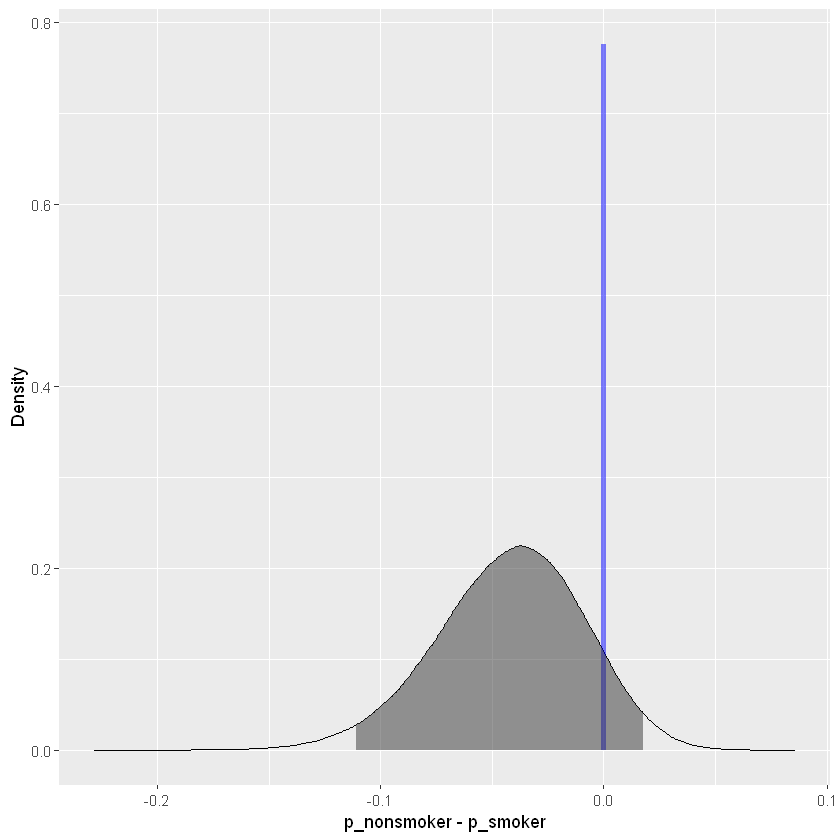

In [24]:
bayes_inference(y = lowbirthweight, x = habit, data = nc, success = "low", statistic = "proportion", 
                hypothesis_prior = c(H1 = 0.5, H2 = 0.5), type = "ht", null = 0.0, alternative = "twosided")

**11. These data provide ___________ evidence ___________ smoking affecting the chance of premature birth.**

    Answer:weak; against.

Warning message in check_beta_prior(beta_prior1):
"No beta prior for p was specified, assuming a uniform prior (p ~ Beta(a=1,b=1)).
  This beta prior is specified using the argument beta_prior1=c(a,b),
  where a and b are your desired hyperparameters."
Warning message in check_beta_prior(beta_prior2):
"No beta prior for p was specified, assuming a uniform prior (p ~ Beta(a=1,b=1)).
  This beta prior is specified using the argument beta_prior2=c(a,b),
  where a and b are your desired hyperparameters."


Response variable: categorical (2 levels, success: premie)
Explanatory variable: categorical (2 levels) 
n_nonsmoker = 872, p_hat_nonsmoker = 0.1525
n_smoker = 126, p_hat_smoker = 0.1508
Hypotheses:
H1: p_nonsmoker =  p_smoker
H2: p_nonsmoker != p_smoker

Priors:
P(p_nonsmoker) ~ Beta(a=1,b=1)
P(p_smoker) ~ Beta(a=1,b=1)
P(H1) = 0.5 
P(H2) = 0.5 

Results:
BF[H1:H2] = 9.1008
P(H1|data) = 0.901 
P(H2|data) = 0.099 


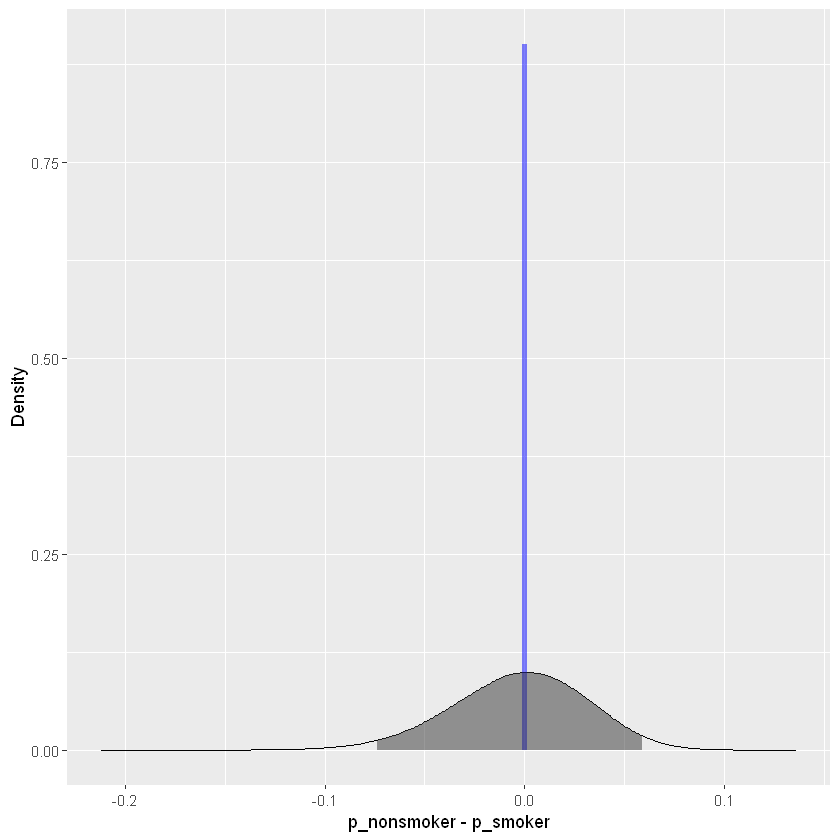

In [25]:
bayes_inference(y = premie, x = habit, data = nc, success = "premie", statistic = "proportion", 
                hypothesis_prior = c(H1 = 0.5, H2 = 0.5), type = "ht", null = 0.0, alternative = "twosided")